In [ ]:
# Installation de PySpark
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=900ff286bf547012b4aed749e2c8c33410600a14f203fe53f12726b6c5d02ce5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Installer Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Télécharger Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Extraire Spark
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

# Installer PySpark
!pip install -q pyspark

# Installer le driver PostgreSQL JDBC
!wget -q https://jdbc.postgresql.org/download/postgresql-42.2.20.jar -P /content/

# Définir les variables d'environnement
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"


In [ ]:
!pip install findspark


In [ ]:
# Importer les modules nécessaires et démarrer une session Spark
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("PostgreSQL-Integration") \
    .config("spark.jars", "/content/postgresql-42.2.20.jar") \
    .getOrCreate()


In [ ]:
jdbc_url = "jdbc:postgresql://postgresql-mia17-hackaton.alwaysdata.net:5432/mia17-hackaton_psql"
properties = {
    "user": "mia17-hackaton",
    "password": "hackaton-mia17",
    "driver": "org.postgresql.Driver"
}


In [ ]:
# Liste des noms de tables
tables = ["olympic_hosts", "olympic_medals", "olympic_results","olympic_athletes"]

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Lire chaque table et stocker dans le dictionnaire
for table in tables:
    df = spark.read.jdbc(url=jdbc_url, table=table, properties=properties)
    dataframes[table] = df
    print(f"DataFrame for table {table}:")
    df.show()


DataFrame for table olympic_hosts:
+---+-------------------+-------------------+-------------------+------------------+-------------------+-----------+---------+
|_id|          game_slug|      game_end_date|    game_start_date|     game_location|          game_name|game_season|game_year|
+---+-------------------+-------------------+-------------------+------------------+-------------------+-----------+---------+
|  0|       beijing-2022|2022-02-20 13:00:00|2022-02-04 16:00:00|             China|       Beijing 2022|     Winter|     2022|
|  1|         tokyo-2020|2021-08-08 16:00:00|2021-07-23 13:00:00|             Japan|         Tokyo 2020|     Summer|     2020|
|  2|   pyeongchang-2018|2018-02-25 09:00:00|2018-02-09 00:00:00| Republic of Korea|   PyeongChang 2018|     Winter|     2018|
|  3|           rio-2016|2016-08-21 23:00:00|2016-08-05 14:00:00|            Brazil|           Rio 2016|     Summer|     2016|
|  4|         sochi-2014|2014-02-23 17:00:00|2014-02-07 05:00:00|Russian Fed

TRAITEMENT DE LA TABLE
**olympic_hosts**




In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_hosts
df_olympic_hosts = dataframes["olympic_hosts"]

# Créer une condition pour vérifier si au moins une colonne n'est pas nulle
non_null_condition = col(df_olympic_hosts.columns[0]).isNotNull()

for column in df_olympic_hosts.columns[1:]:
    non_null_condition = non_null_condition | col(column).isNotNull()

# Filtrer les lignes où au moins une colonne n'est pas nulle
df_non_null_olympic_hosts = df_olympic_hosts.filter(non_null_condition)

# Compter le nombre de lignes non nulles
non_null_count_olympic_hosts = df_non_null_olympic_hosts.count()

print(f"Nombre de lignes où au moins une colonne est non nulle dans la table olympic_hosts: {non_null_count_olympic_hosts}")


Nombre de lignes où au moins une colonne est non nulle dans la table olympic_hosts: 53


In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_hosts
df_olympic_hosts = dataframes["olympic_hosts"]

# Initialiser un dictionnaire pour stocker les résultats
non_null_counts = {}

# Compter les valeurs non nulles pour chaque colonne
for column in df_olympic_hosts.columns:
    non_null_count = df_olympic_hosts.filter(col(column).isNotNull()).count()
    non_null_counts[column] = non_null_count

# Afficher les résultats
for column, count in non_null_counts.items():
    print(f"Nombre de valeurs non nulles dans la colonne {column}: {count}")


Nombre de valeurs non nulles dans la colonne _id: 53
Nombre de valeurs non nulles dans la colonne game_slug: 53
Nombre de valeurs non nulles dans la colonne game_end_date: 53
Nombre de valeurs non nulles dans la colonne game_start_date: 53
Nombre de valeurs non nulles dans la colonne game_location: 53
Nombre de valeurs non nulles dans la colonne game_name: 53
Nombre de valeurs non nulles dans la colonne game_season: 53
Nombre de valeurs non nulles dans la colonne game_year: 53


TRAITEMENT POUR LA TABLE
**Olympic_medals**






In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_hosts
df_olympic_medals = dataframes["olympic_medals"]

# Créer une condition pour vérifier si au moins une colonne n'est pas nulle
non_null_condition = col(df_olympic_medals.columns[0]).isNotNull()

for column in df_olympic_medals.columns[1:]:
    non_null_condition = non_null_condition | col(column).isNotNull()

# Filtrer les lignes où au moins une colonne n'est pas nulle
df_non_null_olympic_medals = df_olympic_medals.filter(non_null_condition)

# Compter le nombre de lignes non nulles
non_null_count_olympic_medals = df_non_null_olympic_medals.count()

print(f"Nombre de lignes où au moins une colonne est non nulle dans la table olympic_medals: {non_null_count_olympic_medals}")

Nombre de lignes où au moins une colonne est non nulle dans la table olympic_medals: 21697


In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_medals
df_olympic_medals = dataframes["olympic_medals"]

# Initialiser un dictionnaire pour stocker les résultats
non_null_counts_medals = {}

# Compter les valeurs non nulles pour chaque colonne
for column in df_olympic_medals.columns:
    non_null_count = df_olympic_medals.filter(col(column).isNotNull()).count()
    non_null_counts_medals[column] = non_null_count

# Afficher les résultats
for column, count in non_null_counts_medals.items():
    print(f"Nombre de valeurs non nulles dans la colonne {column}: {count}")


Nombre de valeurs non nulles dans la colonne _id: 21697
Nombre de valeurs non nulles dans la colonne discipline_title: 21697
Nombre de valeurs non nulles dans la colonne slug_game: 21697
Nombre de valeurs non nulles dans la colonne event_title: 21697
Nombre de valeurs non nulles dans la colonne event_gender: 21697
Nombre de valeurs non nulles dans la colonne medal_type: 21697
Nombre de valeurs non nulles dans la colonne participant_type: 21697
Nombre de valeurs non nulles dans la colonne participant_title: 6584
Nombre de valeurs non nulles dans la colonne athlete_url: 17027
Nombre de valeurs non nulles dans la colonne athlete_full_name: 18073
Nombre de valeurs non nulles dans la colonne country_name: 21697
Nombre de valeurs non nulles dans la colonne country_code: 20195
Nombre de valeurs non nulles dans la colonne country_3_letter_code: 21697


suppression de participant_title, country_3_letter_code, country_code, athlete_url


In [ ]:
# Colonnes à supprimer
columns_to_drop = ["participant_title", "country_3_letter_code", "country_code"]

# Supprimer les colonnes du DataFrame
df_olympic_medals_cleaned = df_olympic_medals.drop(*columns_to_drop)

# Afficher le DataFrame après la suppression des colonnes
df_olympic_medals_cleaned.show()


+---+----------------+------------+--------------------+------------+----------+----------------+--------------------+--------------------+--------------------+
|_id|discipline_title|   slug_game|         event_title|event_gender|medal_type|participant_type|         athlete_url|   athlete_full_name|        country_name|
+---+----------------+------------+--------------------+------------+----------+----------------+--------------------+--------------------+--------------------+
|  0|         Curling|beijing-2022|       Mixed Doubles|       Mixed|      GOLD|        GameTeam|https://olympics....|Stefania CONSTANTINI|               Italy|
|  1|         Curling|beijing-2022|       Mixed Doubles|       Mixed|      GOLD|        GameTeam|https://olympics....|        Amos MOSANER|               Italy|
|  2|         Curling|beijing-2022|       Mixed Doubles|       Mixed|    SILVER|        GameTeam|https://olympics....|    Kristin SKASLIEN|              Norway|
|  3|         Curling|beijing-2022

suppression de lignes null par rapport a athlete_full_name


In [ ]:
# Supprimer les lignes avec des valeurs null dans la colonne athlete_full_name
df_olympic_medals_cleaned = df_olympic_medals_cleaned.dropna(subset=["athlete_full_name"])

# Afficher le DataFrame après la suppression des lignes avec des valeurs null dans athlete_full_name
df_olympic_medals_cleaned.show()


+---+----------------+------------+--------------------+------------+----------+----------------+--------------------+--------------------+--------------------+
|_id|discipline_title|   slug_game|         event_title|event_gender|medal_type|participant_type|         athlete_url|   athlete_full_name|        country_name|
+---+----------------+------------+--------------------+------------+----------+----------------+--------------------+--------------------+--------------------+
|  0|         Curling|beijing-2022|       Mixed Doubles|       Mixed|      GOLD|        GameTeam|https://olympics....|Stefania CONSTANTINI|               Italy|
|  1|         Curling|beijing-2022|       Mixed Doubles|       Mixed|      GOLD|        GameTeam|https://olympics....|        Amos MOSANER|               Italy|
|  2|         Curling|beijing-2022|       Mixed Doubles|       Mixed|    SILVER|        GameTeam|https://olympics....|    Kristin SKASLIEN|              Norway|
|  3|         Curling|beijing-2022

Traitement de donnée pour la table **olympic_results**


In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_hosts
df_olympic_results = dataframes["olympic_results"]

# Créer une condition pour vérifier si au moins une colonne n'est pas nulle
non_null_condition = col(df_olympic_results.columns[0]).isNotNull()

for column in df_olympic_results.columns[1:]:
    non_null_condition = non_null_condition | col(column).isNotNull()

# Filtrer les lignes où au moins une colonne n'est pas nulle
df_non_null_olympic_results = df_olympic_results.filter(non_null_condition)

# Compter le nombre de lignes non nulles
non_null_count_olympic_results = df_non_null_olympic_results.count()

print(f"Nombre de lignes où au moins une colonne est non nulle dans la table olympic_medals: {non_null_count_olympic_results}")

Nombre de lignes où au moins une colonne est non nulle dans la table olympic_medals: 162804


In [ ]:
from pyspark.sql.functions import col

# Récupérer le DataFrame de la table olympic_results
df_olympic_results = dataframes["olympic_results"]

# Initialiser un dictionnaire pour stocker les résultats
non_null_counts_olympic_results = {}

# Compter les valeurs non null pour chaque colonne
for column in df_olympic_results.columns:
    non_null_count = df_olympic_results.filter(col(column).isNotNull()).count()
    non_null_counts_olympic_results[column] = non_null_count

# Afficher les résultats
for column, count in non_null_counts_olympic_results.items():
    print(f"Nombre de valeurs non null dans la colonne {column}: {count}")



Nombre de valeurs non null dans la colonne _id: 162804
Nombre de valeurs non null dans la colonne discipline_title: 162804
Nombre de valeurs non null dans la colonne event_title: 162804
Nombre de valeurs non null dans la colonne slug_game: 162804
Nombre de valeurs non null dans la colonne participant_type: 162804
Nombre de valeurs non null dans la colonne medal_type: 20206
Nombre de valeurs non null dans la colonne athletes: 7976
Nombre de valeurs non null dans la colonne rank_equal: 32525
Nombre de valeurs non null dans la colonne rank_position: 144721
Nombre de valeurs non null dans la colonne country_name: 162804
Nombre de valeurs non null dans la colonne country_code: 157751
Nombre de valeurs non null dans la colonne country_3_letter_code: 162802
Nombre de valeurs non null dans la colonne athlete_url: 130021
Nombre de valeurs non null dans la colonne athlete_full_name: 141666
Nombre de valeurs non null dans la colonne value_unit: 78649
Nombre de valeurs non null dans la colonne val

In [ ]:
# Colonnes à supprimer
columns_to_drop = ["value_type", "value_unit", "country_code","country_3_letter_code","rank_equal","athletes"]

# Supprimer les colonnes du DataFrame
df_olympic_results_cleaned = df_olympic_results.drop(*columns_to_drop)

# Afficher le DataFrame après la suppression des colonnes
df_olympic_results_cleaned.show()

+------+----------------+--------------------+-----------+----------------+----------+-------------+------------+--------------------+--------------------+
|   _id|discipline_title|         event_title|  slug_game|participant_type|medal_type|rank_position|country_name|         athlete_url|   athlete_full_name|
+------+----------------+--------------------+-----------+----------------+----------+-------------+------------+--------------------+--------------------+
|162113|         Fencing| foil individual men|athens-1896|         Athlete|    BRONZE|            3|      Greece|                null|Periklis Pierrako...|
|162114|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|      Greece|https://olympics....|Konstantinos KOMN...|
|162115|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|      France|https://olympics....|    Henri DE LABORDE|
|162116|         Fencing| foil individual men|athens-1896|      

In [ ]:
# Supprimer les lignes avec des valeurs nulles dans la colonne athletes_url
df_olympic_results_cleaned = df_olympic_results_cleaned.dropna(subset=["athlete_url"])

# Afficher le DataFrame après la suppression des colonnes et des lignes avec des valeurs nulles dans la colonne athletes_url
df_olympic_results_cleaned.show()

+------+----------------+--------------------+-----------+----------------+----------+-------------+--------------------+--------------------+--------------------+
|   _id|discipline_title|         event_title|  slug_game|participant_type|medal_type|rank_position|        country_name|         athlete_url|   athlete_full_name|
+------+----------------+--------------------+-----------+----------------+----------+-------------+--------------------+--------------------+--------------------+
|162114|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|              Greece|https://olympics....|Konstantinos KOMN...|
|162115|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|              France|https://olympics....|    Henri DE LABORDE|
|162116|         Fencing| foil individual men|athens-1896|         Athlete|      null|            7|              Greece|https://olympics....|      Ioannis POULOS|
|162118|        

remplir les valeurs nll derank_position avec des moyennes


In [ ]:
from pyspark.sql.functions import mean

# Calculer la moyenne de la colonne "rank-position" (si c'est possible)
mean_rank_position = df_olympic_results_cleaned.select(mean("rank_position")).collect()[0][0]

# Remplacer les valeurs null dans la colonne "rank-position" par la moyenne calculée
df_olympic_results_cleaned = df_olympic_results_cleaned.fillna(mean_rank_position, subset=["rank_position"])

# Afficher le DataFrame après le remplacement des valeurs null dans la colonne "rank-position"
df_olympic_results_cleaned.show()


+------+----------------+--------------------+-----------+----------------+----------+-------------+--------------------+--------------------+--------------------+
|   _id|discipline_title|         event_title|  slug_game|participant_type|medal_type|rank_position|        country_name|         athlete_url|   athlete_full_name|
+------+----------------+--------------------+-----------+----------------+----------+-------------+--------------------+--------------------+--------------------+
|162114|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|              Greece|https://olympics....|Konstantinos KOMN...|
|162115|         Fencing| foil individual men|athens-1896|         Athlete|      null|            5|              France|https://olympics....|    Henri DE LABORDE|
|162116|         Fencing| foil individual men|athens-1896|         Athlete|      null|            7|              Greece|https://olympics....|      Ioannis POULOS|
|162118|        

traitement de la table **olympic_athletes**



In [ ]:
from pyspark.sql import functions as F

# Accéder au DataFrame olympic_athletes depuis le dictionnaire dataframes
olympic_athletes = dataframes["olympic_athletes"]

# Calculer le nombre de valeurs non nulles pour chaque colonne
non_null_counts = olympic_athletes.select([F.count(F.col(c).isNotNull()).alias(c) for c in olympic_athletes.columns])

# Afficher les résultats
non_null_counts.show()


+-----+-----------+-----------------+--------------------+----------+------------------+--------------+-----+
|  _id|athlete_url|athlete_full_name|games_participations|first_game|athlete_year_birth|athlete_medals|  bio|
+-----+-----------+-----------------+--------------------+----------+------------------+--------------+-----+
|75904|      75904|            75904|               75904|     75904|             75904|         75904|75904|
+-----+-----------+-----------------+--------------------+----------+------------------+--------------+-----+



***DIAGRAMMES***

In [ ]:
# Grouper les données par athlète (athlete_full_name) et compter le nombre d'occurrences de chaque athlète
participants_count = df_olympic_results_cleaned.groupBy('athlete_full_name').count().orderBy('count', ascending=False)

# Renommer la colonne de comptage
participants_count = participants_count.withColumnRenamed('count', 'participant_count')

# Afficher les premiers athlètes de cette liste
participants_count.show(10)




+--------------------+-----------------+
|   athlete_full_name|participant_count|
+--------------------+-----------------+
|   Heikki SAVOLAINEN|               34|
|       Alfred JOCHIM|               27|
|         Takashi ONO|               24|
|      Joseph STOFFEL|               23|
|Johann (Hans) SAUTER|               22|
|        Georges MIEZ|               22|
|      Michel MATHIOT|               22|
|          Lajos TOTH|               21|
|Rafael LECUONA AS...|               21|
|       IstvÃ¡n PELLE|               21|
+--------------------+-----------------+
only showing top 10 rows



<Figure size 1000x600 with 0 Axes>

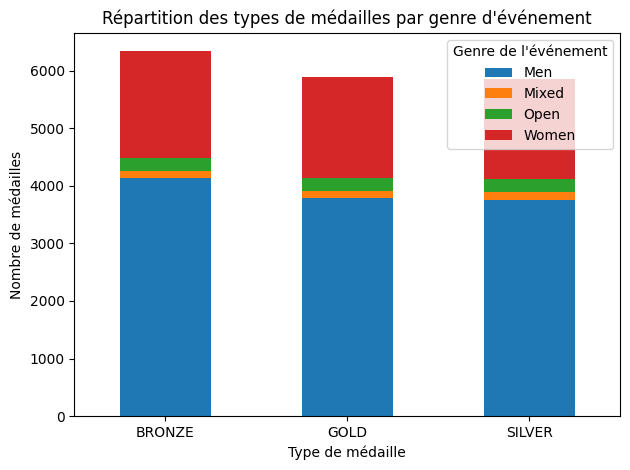

In [ ]:
import matplotlib.pyplot as plt

# Convertir le DataFrame en Pandas DataFrame pour la visualisation
df_pd = df_olympic_medals_cleaned.toPandas()

# Créer le diagramme à barres groupées
plt.figure(figsize=(10, 6))
df_pd.groupby(['medal_type', 'event_gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Répartition des types de médailles par genre d\'événement')
plt.xlabel('Type de médaille')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=0)
plt.legend(title='Genre de l\'événement')
plt.tight_layout()

# Afficher le diagramme
plt.show()


<Figure size 1200x800 with 0 Axes>

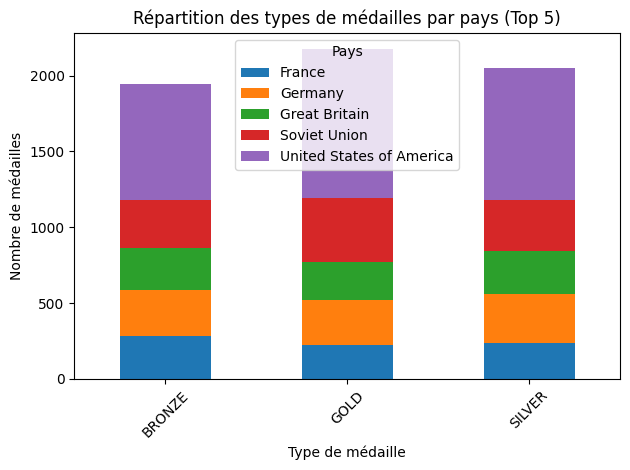

In [ ]:
import matplotlib.pyplot as plt

# Convertir le DataFrame en Pandas DataFrame pour la visualisation
df_pd = df_olympic_medals_cleaned.toPandas()

# Obtenir les cinq premiers pays ayant remporté des médailles
top_countries = df_pd['country_name'].value_counts().head(5).index

# Filtrer le DataFrame pour inclure uniquement les cinq premiers pays
df_pd_top_countries = df_pd[df_pd['country_name'].isin(top_countries)]

# Créer le diagramme à barres groupées
plt.figure(figsize=(12, 8))
df_pd_top_countries.groupby(['medal_type', 'country_name']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Répartition des types de médailles par pays (Top 5)')
plt.xlabel('Type de médaille')
plt.ylabel('Nombre de médailles')
plt.xticks(rotation=45)
plt.legend(title='Pays')
plt.tight_layout()

# Afficher le diagramme
plt.show()


**la jointure de données :**

In [ ]:
# Renommer les colonnes ambiguës dans les DataFrames pour éviter les conflits
df_olympic_hosts = df_olympic_hosts.withColumnRenamed('_id', 'host_id') \
                                   .withColumnRenamed('game_slug', 'host_game_slug') \
                                   .withColumnRenamed('game_end_date', 'host_game_end_date') \
                                   .withColumnRenamed('game_start_date', 'host_game_start_date') \
                                   .withColumnRenamed('game_location', 'host_game_location') \
                                   .withColumnRenamed('game_name', 'host_game_name') \
                                   .withColumnRenamed('game_season', 'host_game_season') \
                                   .withColumnRenamed('game_year', 'host_game_year')

df_olympic_medals = df_olympic_medals.withColumnRenamed('_id', 'medal_id') \
                                     .withColumnRenamed('discipline_title', 'medal_discipline_title') \
                                     .withColumnRenamed('slug_game', 'medal_slug_game') \
                                     .withColumnRenamed('event_title', 'medal_event_title') \
                                     .withColumnRenamed('event_gender', 'medal_event_gender') \
                                     .withColumnRenamed('medal_type', 'medal_medal_type') \
                                     .withColumnRenamed('participant_type', 'medal_participant_type') \
                                     .withColumnRenamed('athlete_url', 'medal_athlete_url') \
                                     .withColumnRenamed('country_name', 'medal_country_name') \
                                     .withColumnRenamed('country_code', 'medal_country_code') \
                                     .withColumnRenamed('country_3_letter_code', 'medal_country_3_letter_code')

df_olympic_results = df_olympic_results.withColumnRenamed('_id', 'result_id') \
                                       .withColumnRenamed('discipline_title', 'result_discipline_title') \
                                       .withColumnRenamed('event_title', 'result_event_title') \
                                       .withColumnRenamed('slug_game', 'result_slug_game') \
                                       .withColumnRenamed('participant_type', 'result_participant_type') \
                                       .withColumnRenamed('medal_type', 'result_medal_type') \
                                       .withColumnRenamed('athletes', 'result_athletes') \
                                       .withColumnRenamed('rank_equal', 'result_rank_equal') \
                                       .withColumnRenamed('rank_position', 'result_rank_position') \
                                       .withColumnRenamed('country_name', 'result_country_name') \
                                       .withColumnRenamed('country_code', 'result_country_code') \
                                       .withColumnRenamed('country_3_letter_code', 'result_country_3_letter_code') \
                                       .withColumnRenamed('athlete_url', 'result_athlete_url') \
                                       .withColumnRenamed('athlete_full_name', 'result_athlete_full_name') \
                                       .withColumnRenamed('value_unit', 'result_value_unit') \
                                       .withColumnRenamed('value_type', 'result_value_type')

olympic_athletes = olympic_athletes.withColumnRenamed('_id', 'athlete_id') \
                                   .withColumnRenamed('athlete_url', 'athlete_athlete_url') \
                                   .withColumnRenamed('athlete_full_name', 'athlete_athlete_full_name') \
                                   .withColumnRenamed('games_participations', 'athlete_games_participations') \
                                   .withColumnRenamed('first_game', 'athlete_first_game') \
                                   .withColumnRenamed('athlete_year_birth', 'athlete_year_birth') \
                                   .withColumnRenamed('athlete_medals', 'athlete_medals') \
                                   .withColumnRenamed('bio', 'athlete_bio')

# Joindre les tables
joined_df = df_olympic_hosts.join(df_olympic_medals, df_olympic_hosts['host_game_slug'] == df_olympic_medals['medal_slug_game'], 'inner') \
    .join(df_olympic_results, df_olympic_medals['medal_athlete_url'] == df_olympic_results['result_athlete_url'], 'inner') \
    .join(olympic_athletes, df_olympic_results['result_athlete_url'] == olympic_athletes['athlete_athlete_url'], 'inner')

# Afficher les colonnes du DataFrame pour identifier les doublons
print("Colonnes du DataFrame joint:", joined_df.columns)

# Identifier les colonnes en double
unique_columns = []
seen_columns = set()

for col in joined_df.columns:
    if col not in seen_columns:
        unique_columns.append(col)
        seen_columns.add(col)

# Créer un nouveau DataFrame avec les colonnes uniques
joined_df_unique = joined_df.select(*unique_columns)

# Afficher le nouveau DataFrame avec les colonnes uniques
joined_df_unique.show()

Colonnes du DataFrame joint: ['host_id', 'host_game_slug', 'host_game_end_date', 'host_game_start_date', 'host_game_location', 'host_game_name', 'host_game_season', 'host_game_year', 'medal_id', 'medal_discipline_title', 'medal_slug_game', 'medal_event_title', 'medal_event_gender', 'medal_medal_type', 'medal_participant_type', 'participant_title', 'medal_athlete_url', 'athlete_full_name', 'medal_country_name', 'medal_country_code', 'medal_country_3_letter_code', 'result_id', 'result_discipline_title', 'result_event_title', 'result_slug_game', 'result_participant_type', 'result_medal_type', 'result_athletes', 'result_rank_equal', 'result_rank_position', 'result_country_name', 'result_country_code', 'result_country_3_letter_code', 'result_athlete_url', 'result_athlete_full_name', 'result_value_unit', 'result_value_type', 'athlete_id', 'athlete_athlete_url', 'athlete_athlete_full_name', 'athlete_games_participations', 'athlete_first_game', 'athlete_year_birth', 'athlete_medals', 'athlete_

LA **PREDICTION**

DEEP LEARNIN MLP

In [ ]:
!pip install pyspark

from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [ ]:
spark = SparkSession.builder \
    .appName("Olympic Medal Prediction") \
    .getOrCreate()


In [ ]:
joined_df.show()

+-------+--------------------+-------------------+--------------------+------------------+--------------------+----------------+--------------+--------+----------------------+--------------------+--------------------+------------------+----------------+----------------------+-----------------+--------------------+--------------------+------------------+------------------+---------------------------+---------+-----------------------+--------------------+--------------------+-----------------------+-----------------+---------------+-----------------+--------------------+-------------------+-------------------+----------------------------+--------------------+------------------------+-----------------+-----------------+----------+--------------------+-------------------------+----------------------------+------------------+------------------+--------------+--------------------+
|host_id|      host_game_slug| host_game_end_date|host_game_start_date|host_game_location|      host_game_name|h

In [ ]:
###################" first try failed
"
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Convertir les variables catégorielles en variables numériques avec StringIndexer
indexer_athlete = StringIndexer(inputCol="joined_df.athlete_full_name", outputCol="athlete_full_name_index", handleInvalid="skip")
indexer_medal = StringIndexer(inputCol="joined_df.medal_type", outputCol="medal_type_index", handleInvalid="skip")

# Créer un assembleur de vecteurs contenant toutes les fonctionnalités nécessaires à l'entraînement du modèle
assembler = VectorAssembler(inputCols=['athlete_full_name_index', 'medal_type_index', 'game_year'],  # Ajoutez les autres fonctionnalités nécessaires
                            outputCol="features")

# Appliquer les transformations aux données
indexed_df = joined_df
indexed_df = indexer_athlete.fit(indexed_df).transform(indexed_df)
indexed_df = indexer_medal.fit(indexed_df).transform(indexed_df)

# Appliquer l'assembleur de vecteurs
assembled_df = assembler.transform(indexed_df)

# Afficher le DataFrame résultant avec les nouvelles colonnes indexées et la colonne de fonctionnalités assemblées
assembled_df.select("athlete_full_name", "athlete_full_name_index", "medal_type", "medal_type_index", "game_year", "features").show()







ESSAIE AVEC DATAFRAME FUSIONNEE:

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType

# Convertir la colonne "host_game_end_date" en StringType (anciennement "game_end_date")
joined_df_unique = joined_df_unique.withColumn("host_game_end_date", col("host_game_end_date").cast(StringType()))


In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Sélection des colonnes (nouveaux noms après renommage)
selected_columns = [
    'host_game_slug', 'host_game_end_date', 'host_game_location', 'host_game_name',
    'host_game_season', 'host_game_year', 'medal_event_gender', 'medal_medal_type',
    'medal_participant_type', 'result_discipline_title', 'result_event_title',
    'result_slug_game', 'result_participant_type', 'result_rank_position',
    'result_country_name', 'result_athlete_url', 'result_athlete_full_name',
    'athlete_games_participations', 'athlete_first_game', 'athlete_year_birth'
]

# Convertir les variables catégorielles en variables numériques avec StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip")
            for col in selected_columns if col not in ['result_rank_position', 'athlete_games_participations', 'athlete_year_birth']]

# Créer un assembleur de vecteurs contenant toutes les fonctionnalités nécessaires à l'entraînement du modèle
assembler = VectorAssembler(inputCols=[col+"_index" for col in selected_columns if col not in ['result_rank_position', 'athlete_games_participations', 'athlete_year_birth']],
                            outputCol="features")

# Appliquer les transformations aux données
indexed_df = joined_df_unique
for indexer in indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

# Appliquer l'assembleur de vecteurs
assembled_df = assembler.transform(indexed_df)

# Diviser les données en ensembles de formation et de test
(training_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Créer le modèle DNN
layers = [len(selected_columns) - 3, 64, 32, 16, 3]  # Nombre de neurones par couche
dnn = MultilayerPerceptronClassifier(layers=layers, seed=42, featuresCol='features', labelCol='medal_medal_type_index', maxIter=100)

# Entraîner le modèle
model = dnn.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions = model.transform(test_data)

# Évaluer la précision du modèle
evaluator = MulticlassClassificationEvaluator(labelCol="medal_medal_type_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)


Accuracy: 0.39575108103026885


le resultat est faible et donc :
Dans ce code, j'ai changé les paramètres suivants :

layers : J'ai ajouté plus de couches et plus de neurones par couche pour augmenter la complexité du modèle.
maxIter : J'ai augmenté le nombre maximum d'itérations pour permettre au modèle de s'entraîner plus longtemps.
stepSize : J'ai augmenté la taille du pas pour accélérer la convergence de l'algorithme d'optimisation.
tolerance : J'ai diminué la tolérance pour spécifier un critère de convergence plus strict.

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Sélection des colonnes (nouveaux noms après renommage)
selected_columns = [
    'host_game_slug', 'host_game_end_date', 'host_game_location', 'host_game_name',
    'host_game_season', 'host_game_year', 'medal_event_gender', 'medal_medal_type',
    'medal_participant_type', 'result_discipline_title', 'result_event_title',
    'result_slug_game', 'result_participant_type', 'result_rank_position',
    'result_country_name', 'result_athlete_url', 'result_athlete_full_name',
    'athlete_games_participations', 'athlete_first_game', 'athlete_year_birth'
]

# Convertir les variables catégorielles en variables numériques avec StringIndexer
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index", handleInvalid="skip")
            for col in selected_columns if col not in ['result_rank_position', 'athlete_games_participations', 'athlete_year_birth']]

# Créer un assembleur de vecteurs contenant toutes les fonctionnalités nécessaires à l'entraînement du modèle
assembler = VectorAssembler(inputCols=[col+"_index" for col in selected_columns if col not in ['result_rank_position', 'athlete_games_participations', 'athlete_year_birth']],
                            outputCol="features")

# Appliquer les transformations aux données
indexed_df = joined_df_unique
for indexer in indexers:
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)

# Appliquer l'assembleur de vecteurs
assembled_df = assembler.transform(indexed_df)

# Diviser les données en ensembles de formation et de test
(training_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=42)

# Créer le modèle DNN avec des paramètres différents
layers = [len(selected_columns) - 3, 128, 64, 32, 16, 8, 3]  # Nombre de neurones par couche
maxIter = 200
stepSize = 0.03
tolerance = 1e-6
dnn = MultilayerPerceptronClassifier(layers=layers, seed=42, featuresCol='features', labelCol='medal_medal_type_index', maxIter=maxIter, stepSize=stepSize, tol=tolerance)

# Entraîner le modèle
model = dnn.fit(training_data)

# Faire des prédictions sur l'ensemble de test
predictions = model.transform(test_data)

# Évaluer la précision du modèle
evaluator = MulticlassClassificationEvaluator(labelCol="medal_medal_type_index", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)



Accuracy: 0.3927429968039105


In [ ]:
from pyspark.sql.functions import col

# Sélectionner les colonnes pertinentes et les résultats prédits
result_columns = ['result_country_name', 'medal_medal_type', 'prediction']
predicted_results = predictions.select(*result_columns)

# Afficher quelques exemples de résultats
predicted_results.show(20)

# Pour interpréter les indices des médailles, vous devez inversement transformer les indices en valeurs originales
from pyspark.ml.feature import IndexToString

# Créer un inverseur pour les indices de médailles
medal_label_reverse = IndexToString(inputCol="prediction", outputCol="predicted_medal", labels=model.stages[-1].labels)

# Appliquer la transformation inverse pour obtenir les valeurs originales des médailles
final_results = medal_label_reverse.transform(predicted_results)

# Afficher les résultats finaux
final_results.select('result_country_name', 'predicted_medal').show(20)


+--------------------+----------------+----------+
| result_country_name|medal_medal_type|prediction|
+--------------------+----------------+----------+
|          San Marino|          SILVER|       0.0|
|People's Republic...|            GOLD|       2.0|
|           Australia|          BRONZE|       2.0|
|          Kazakhstan|          BRONZE|       2.0|
|United States of ...|          BRONZE|       2.0|
|United States of ...|            GOLD|       2.0|
|             Finland|          SILVER|       1.0|
|              Poland|            GOLD|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|              Poland|          SILVER|       0.0|
|German Democratic...|            GOLD|       0.0|
|              Canada|         

AttributeError: 'MultilayerPerceptronClassificationModel' object has no attribute 'stages'

**Machine learning Random Forest**

pre-traitement de données